EXPLORATORY WORK

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
train_data = pd.read_csv("../data/train.csv", delimiter=",")
train_data.head()

C:\Users\xavip\AppData\Local\Temp\ipykernel_71124\2465173449.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("../data/train.csv", delimiter=",")


,Characteristics.LotFeatures,Characteristics.LotSizeSquareFeet,ImageData.c1c6.summary.bathroom,ImageData.c1c6.summary.exterior,ImageData.c1c6.summary.interior,ImageData.c1c6.summary.kitchen,ImageData.c1c6.summary.property,ImageData.features_reso.results,ImageData.q1q6.summary.bathroom,ImageData.q1q6.summary.exterior,...,Structure.FireplacesTotal,Structure.GarageSpaces,Structure.Heating,Structure.LivingArea,Structure.NewConstructionYN,Structure.ParkingFeatures,Structure.Rooms.RoomsTotal,Structure.YearBuilt,Tax.Zoning,UnitTypes.UnitTypeType
0,NaN,3200.0,NaN,NaN,NaN,NaN,NaN,"['Cooling.CeilingFans', 'Flooring.Carpet', 'Fl...",NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,0.0,commr,NaN
1,NaN,NaN,NaN,3.8,3.7,3.8,3.8,"['Appliances.GasRange', 'Appliances.Range', 'A...",NaN,4.2,...,NaN,NaN,['natural gas'],3175.0,False,['off alley'],6.0,NaN,NaN,NaN
2,NaN,18750.0,NaN,NaN,NaN,NaN,NaN,"['Flooring.Carpet', 'ParkingFeatures.Garage', ...",NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1926.0,commr,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['CommunityFeatures.Lake', 'WaterfrontFeatures...",NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,agric,NaN
4,"['horses allowed', 'paddock', 'pond(s)']",NaN,NaN,3.6,NaN,NaN,3.6,"['Appliances.Refrigerator', 'Appliances.Microw...",NaN,4.2,...,NaN,NaN,['other'],0.0,False,"['unassigned', 'off street']",4.0,2006.0,NaN,NaN


In [5]:
train_data.columns

Index(['Characteristics.LotFeatures', 'Characteristics.LotSizeSquareFeet',
       'ImageData.c1c6.summary.bathroom', 'ImageData.c1c6.summary.exterior',
       'ImageData.c1c6.summary.interior', 'ImageData.c1c6.summary.kitchen',
       'ImageData.c1c6.summary.property', 'ImageData.features_reso.results',
       'ImageData.q1q6.summary.bathroom', 'ImageData.q1q6.summary.exterior',
       'ImageData.q1q6.summary.interior', 'ImageData.q1q6.summary.kitchen',
       'ImageData.q1q6.summary.property', 'ImageData.room_type_reso.results',
       'ImageData.style.exterior.summary.label',
       'ImageData.style.stories.summary.label', 'Listing.Dates.CloseDate',
       'Listing.ListingId', 'Listing.Price.ClosePrice',
       'Location.Address.CensusBlock', 'Location.Address.CensusTract',
       'Location.Address.City', 'Location.Address.CountyOrParish',
       'Location.Address.PostalCode', 'Location.Address.PostalCodePlus4',
       'Location.Address.StateOrProvince',
       'Location.Address.Stre

FEATURES

<Axes: >

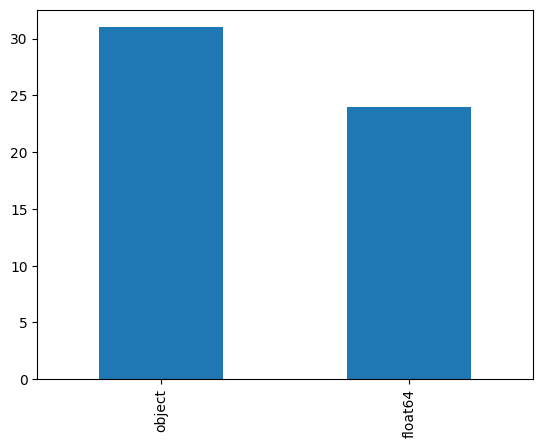

In [13]:
#dame el tipo de dato de cada columna y haz histograma
types = train_data.dtypes
types.value_counts().plot(kind="bar")


<Axes: >

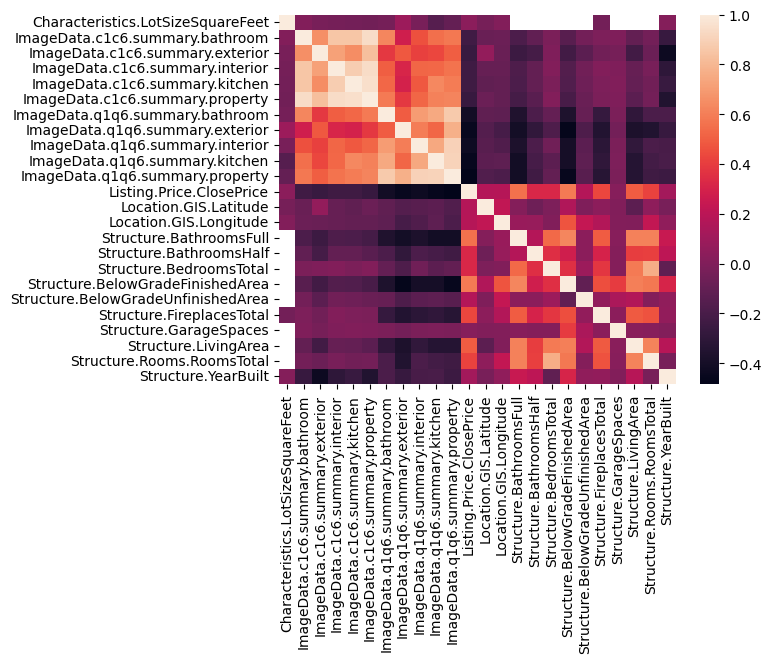

In [20]:
numeric_train_data = train_data.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_train_data.corr())

In [21]:
train_data["Structure.Cooling"].unique()

array(["['central air']", "['window/wall unit - 1']", nan,
       "['partial', 'none']", "['central air', 'zoned']",
       "['central air', 'zoned', 'ceiling fan(s)']",
       "['central individual']", "['none']", "['office only']",
       "['central individual', 'office only', 'partial']",
       "['window/wall units - 2']", "['window unit(s)']",
       "['central air', 'window unit(s)']",
       "['central individual', 'wall sleeve']", "['other']",
       "['central air', 'electric']", "['reverse cycle']",
       "['central air', 'space pac']", "['window/wall units - 3+']",
       "['partial']", "['central air', 'central individual']",
       "['central air', 'window/wall units - 3+']",
       "['wall sleeve', 'window unit(s)']", "['space pac']",
       "['central air', 'zoned', 'gas', 'dual']",
       "['central air', 'window/wall units - 2']",
       "['window/wall units - 3+', 'zoned']", "['chillers']",
       "['central air', 'office only', 'window unit(s)']",
       "['window/w

In [24]:

#train_data["Location.GIS.Latitude"].isnull().sum()
train_data["Location.GIS.Longitude"].isnull().sum()

6997

In [25]:
cat_train_data = train_data.select_dtypes(include=["object"])
cat_train_data.head()

,Characteristics.LotFeatures,ImageData.features_reso.results,ImageData.room_type_reso.results,ImageData.style.exterior.summary.label,ImageData.style.stories.summary.label,Listing.Dates.CloseDate,Listing.ListingId,Location.Address.CensusBlock,Location.Address.CensusTract,Location.Address.City,...,Location.Area.SubdivisionName,Location.School.HighSchoolDistrict,Property.PropertyType,Structure.Basement,Structure.Cooling,Structure.Heating,Structure.NewConstructionYN,Structure.ParkingFeatures,Tax.Zoning,UnitTypes.UnitTypeType
0,NaN,"['Cooling.CeilingFans', 'Flooring.Carpet', 'Fl...","['Other', 'FrontOfStructure', 'Basement', 'Sta...",NaN,NaN,2023-12-22T00:00:00,mrd09114306,17-195-300-1004,17-195-300,morrison,...,NaN,NaN,commercial sale,NaN,['central air'],NaN,False,NaN,commr,NaN
1,NaN,"['Appliances.GasRange', 'Appliances.Range', 'A...","['SideOfStructure', 'Other', 'Kitchen', 'Office']",NaN,NaN,2023-09-19T00:00:00,mrd09478582,17-97-865400-2007,17-97-865400,highland park,...,NaN,112,residential,['partial'],['window/wall unit - 1'],['natural gas'],False,['off alley'],NaN,NaN
2,NaN,"['Flooring.Carpet', 'ParkingFeatures.Garage', ...","['Community', 'FrontOfStructure', 'Other', 'Ga...",bungalow,2_stories,2023-12-04T00:00:00,mrd09595738,17-31-210900-2014,17-31-210900,chicago,...,NaN,NaN,commercial sale,NaN,['central air'],NaN,False,NaN,commr,NaN
3,NaN,"['CommunityFeatures.Lake', 'WaterfrontFeatures...","['Yard', 'View']",NaN,NaN,2023-08-01T00:00:00,mrd09604772,NaN,NaN,wilmington,...,NaN,209u,farm,NaN,NaN,NaN,False,NaN,agric,NaN
4,"['horses allowed', 'paddock', 'pond(s)']","['Appliances.Refrigerator', 'Appliances.Microw...","['FrontOfStructure', 'BackOfStructure', 'Commu...",ranch,1_story,2023-09-20T00:00:00,mrd09795957,17-89-852403-1029,17-89-852403,maple park,...,NaN,301,residential,['full'],"['partial', 'none']",['other'],False,"['unassigned', 'off street']",NaN,NaN


In [29]:
cat_train_data["Characteristics.LotFeatures"].unique()

array([nan, "['horses allowed', 'paddock', 'pond(s)']",
       "['cul-de-sac', 'fenced yard', 'landscaped', 'wooded']", ...,
       "['common grounds', 'corner lot', 'landscaped', 'park adjacent', 'sidewalks', 'streetlights']",
       "['cul-de-sac', 'fenced yard', 'wetlands adjacent']",
       "['common grounds', 'corner lot', 'fenced yard', 'park adjacent', 'mature trees']"],
      dtype=object)

In [65]:
df_expensive =  train_data[train_data["Listing.Price.ClosePrice"] > 700000]

In [66]:
#haz un count de lot_features_expensive y haz bar plot
import re

# Inicializar la lista de características de lote
lot_features = []

# Recolectar todas las características de los lotes
for row in df_expensive["Characteristics.LotFeatures"]:
    if pd.notnull(row):
        lot_features.extend(row.split(","))  # Usar 'extend' en lugar de 'append' para aplanar

# Limpiar las características eliminando caracteres no deseados
lot_features_expensive = [re.sub(r"[^a-zA-Z\s]", "", feature).strip() for feature in lot_features]

# Imprimir el resultado
print(lot_features_expensive)


['horses allowed', 'paddock', 'ponds', 'culdesac', 'fenced yard', 'landscaped', 'wooded', 'landscaped', 'culdesac', 'landscaped', 'culdesac', 'forest preserve adjacent', 'wooded', 'mature trees', 'sidewalks', 'streetlights', 'sloped', 'horses allowed', 'irregular lot', 'landscaped', 'wooded', 'landscaped', 'landscaped', 'beach', 'water rights', 'water view', 'dock', 'lake access', 'waterfront', 'beach', 'water rights', 'water view', 'dock', 'lake access', 'waterfront', 'corner lot', 'corner lot', 'corner lot', 'golf course lot', 'landscaped', 'horses allowed', 'wooded', 'mature trees', 'backs to open grnd', 'common grounds', 'landscaped', 'river front', 'landscaped', 'fenced yard', 'nature preserve adjacent', 'landscaped', 'horses allowed', 'ponds', 'wooded', 'landscaped', 'park adjacent', 'landscaped', 'corner lot', 'golf course lot', 'irregular lot', 'landscaped', 'water view', 'nature preserve adjacent', 'horses allowed', 'wooded', 'mature trees', 'garden', 'common grounds', 'park a

In [67]:
import pandas as pd
import matplotlib.pyplot as plt


# Cuenta las características de lotes
lot_features_count = pd.Series(list(lot_features_expensive)).value_counts()
#ordena de mayor a menor
lot_features_count = lot_features_count.sort_values(ascending=False)
lot_features_count

landscaped                      2347
fenced yard                     1682
mature trees                    1056
corner lot                       768
culdesac                         721
wooded                           545
sidewalks                        457
water view                       431
streetlights                     357
common grounds                   309
outdoor lighting                 305
ponds                            230
irregular lot                    214
park adjacent                    188
lake front                       170
golf course lot                  136
horses allowed                   128
water rights                     112
nature preserve adjacent         107
views                            101
backs to treeswoods               94
garden                            94
wood fence                        89
waterfront                        87
forest preserve adjacent          87
level                             72
lake access                       67
p

In [69]:
test_data = pd.read_csv("../data/test.csv",delimiter=",")
test_data["Listing.Dates.CloseDate"].unique()

C:\Users\xavip\AppData\Local\Temp\ipykernel_71124\3147821347.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv("../data/test.csv",delimiter=",")


array(['2024-08-06T00:00:00', '2024-07-26T00:00:00',
       '2024-07-10T00:00:00', '2024-07-01T00:00:00',
       '2024-07-31T00:00:00', '2024-08-23T00:00:00',
       '2024-08-05T00:00:00', '2024-07-18T00:00:00',
       '2024-08-22T00:00:00', '2024-07-17T00:00:00',
       '2024-08-01T00:00:00', '2024-07-25T00:00:00',
       '2024-08-09T00:00:00', '2024-07-08T00:00:00',
       '2024-08-27T00:00:00', '2024-07-16T00:00:00',
       '2024-07-29T00:00:00', '2024-07-15T00:00:00',
       '2024-07-19T00:00:00', '2024-07-02T00:00:00',
       '2024-07-03T00:00:00', '2024-08-02T00:00:00',
       '2024-08-14T00:00:00', '2024-07-30T00:00:00',
       '2024-08-19T00:00:00', '2024-07-23T00:00:00',
       '2024-08-16T00:00:00', '2024-07-24T00:00:00',
       '2024-07-09T00:00:00', '2024-07-11T00:00:00',
       '2024-08-29T00:00:00', '2024-07-27T00:00:00',
       '2024-08-28T00:00:00', '2024-08-12T00:00:00',
       '2024-08-15T00:00:00', '2024-08-13T00:00:00',
       '2024-07-22T00:00:00', '2024-07-12T00:0